# Load Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px

# Load Data

In [3]:
food_data = pd.read_csv("food.csv", index_col=0)

# Print Dimensions and Missing Values

In [4]:

print(f"Dimensions: {food_data.shape[0]} x {food_data.shape[1]}")
print(f"Missing values (n): {food_data.isna().sum().sum()}")

Dimensions: 25 x 9
Missing values (n): 0


# Compute PCA and Scores

In [5]:

# Scale the data
scaler = StandardScaler()
food_data_scaled = scaler.fit_transform(food_data)

# Perform PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(food_data_scaled)

# Create DataFrame for scores
scores_df = pd.DataFrame(pca_results, columns=['PC1', 'PC2'], index=food_data.index)

# Flip the scores so the plots are similar to R output
scores_df['PC1'] = -scores_df['PC1']  
scores_df['PC2'] = -scores_df['PC2']

# Plot with matplotlib

C:\Users\micro\AppData\Local\Temp\ipykernel_12976\2368569373.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (scores_df['PC1'][i]+0.05, scores_df['PC2'][i]+0.05))


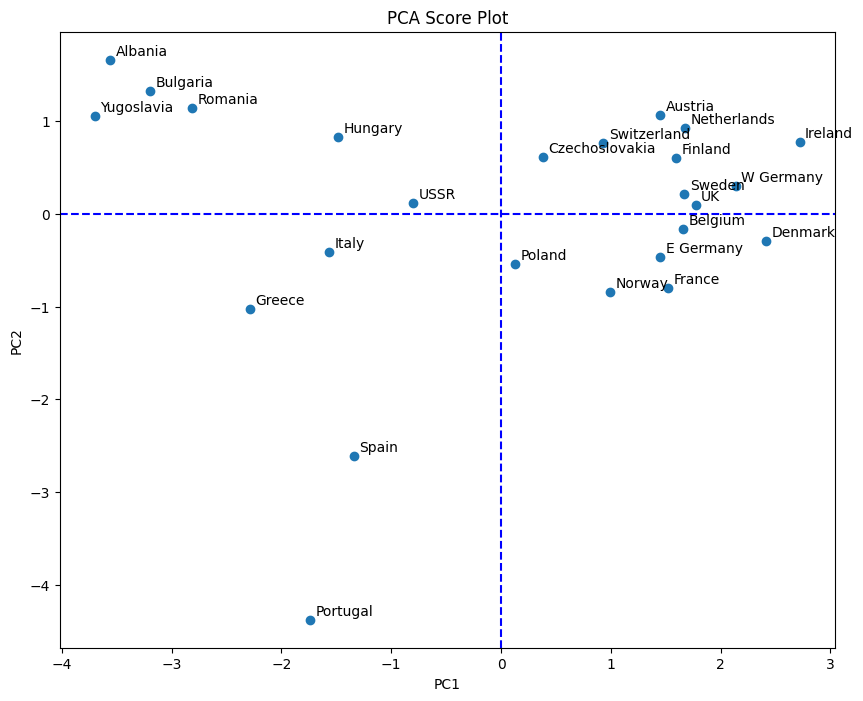

In [6]:

plt.figure(figsize=(10, 8))
plt.scatter(scores_df['PC1'], scores_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(y=0, color='b', linestyle='--')  #
plt.axvline(x=0, color='b', linestyle='--')  
plt.title('PCA Score Plot')
for i, txt in enumerate(scores_df.index):
    plt.annotate(txt, (scores_df['PC1'][i]+0.05, scores_df['PC2'][i]+0.05))
plt.show()

# Calculate Ranges to center Axis

In [9]:
x_min, x_max = scores_df['PC1'].min(), scores_df['PC1'].max()
y_min, y_max = scores_df['PC2'].min(), scores_df['PC2'].max()
x_lim = max(abs(x_min), abs(x_max))
y_lim = max(abs(y_min), abs(y_max))
x_lim += x_lim * 0.05
y_lim += y_lim * 0.05

# Plot with centered Axis

C:\Users\micro\AppData\Local\Temp\ipykernel_12976\3563441611.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (scores_df['PC1'][i]+0.05, scores_df['PC2'][i]+0.05))


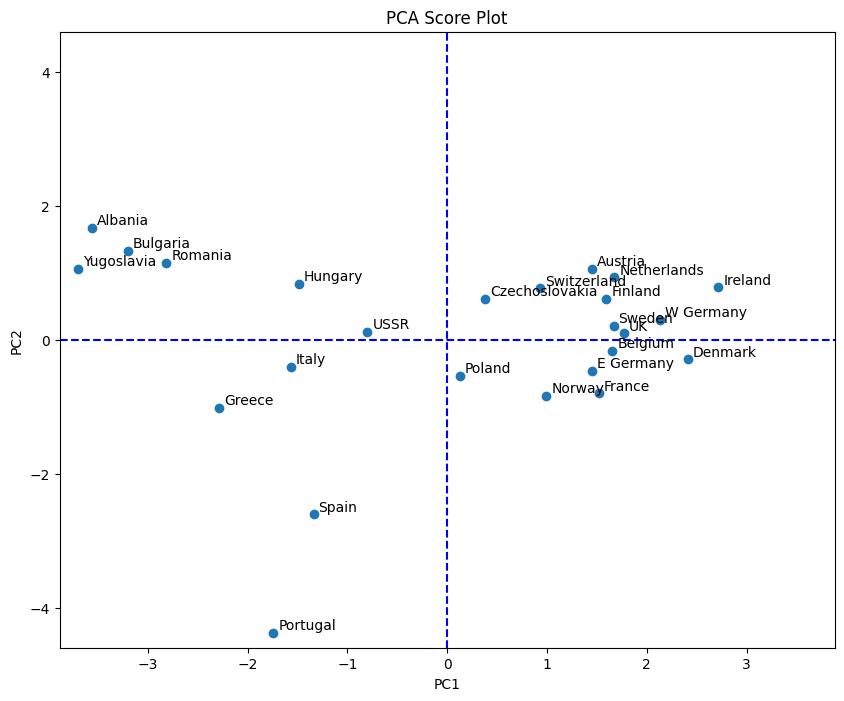

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(scores_df['PC1'], scores_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(y=0, color='b', linestyle='--')  # Add horizontal line through origin
plt.axvline(x=0, color='b', linestyle='--')  # Add vertical line through origin
plt.xlim(-x_lim, x_lim)  # Center x-axis around the origin
plt.ylim(-y_lim, y_lim)  # Center y-axis around the origin
plt.title('PCA Score Plot')
for i, txt in enumerate(scores_df.index):
    plt.annotate(txt, (scores_df['PC1'][i]+0.05, scores_df['PC2'][i]+0.05))
plt.show()